#Mushroom Toxicity Analysis
#By Joshua E. Jodesty

####Data Source
UCI Dataset via:
* Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf 
* Donor: [Jeff Schlimmer] (Jeffrey.Schlimmer@a.gp.cs.cmu.edu) 

####Imports

In [171]:
%matplotlib inline
#import itertools
import pandas as pd, os
from pandas import pivot_table
import numpy as np
import pydot
import pyparsing
from sklearn.externals.six import StringIO

#SciKit toolkit
from sklearn.externals.six import StringIO
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Estimatores/Algorithms/Tools: 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Classification Metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, hamming_loss, zero_one_loss
from sklearn.metrics import brier_score_loss, jaccard_similarity_score,log_loss,matthews_corrcoef
from sklearn.metrics import precision_recall_fscore_support

# Clustering
from sklearn.cluster import AgglomerativeClustering as AggloClust

# Model Evaluation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score

# Plotting/Output
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pydot
import pyparsing
import seaborn as sns
sns.set(color_codes=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1. Data Extraction, Cleansing, & Transformation

In [172]:
columns = ['CLASS', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 
                'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
                'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
                'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 
                'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 
                'population', 'habitat']
shrooms = pd.read_csv('agaricus-lepiota.data', header = None, names = columns)

for col in columns:
    shrooms = shrooms[shrooms[col] != '?']
    
shrooms['CLASS'] = shrooms['CLASS'].replace('e', 1).replace('p', 0)

# shuffling the df index
shrooms = shrooms.iloc[np.random.permutation(len(shrooms))]

y = shrooms['CLASS']
X = pd.get_dummies(shrooms[columns[1:]])

###2. Modeling & Feature Importances: Create Model with Random Forest Classifier in order to determine important Bernoulli Variable features determining mushroom toxicity

In [173]:
rfclf = RandomForestClassifier(random_state = 777)
new_X = rfclf.fit_transform(X, y)
model = rfclf.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [174]:
top_rank = []
for f in range(len(new_X[0])):
    top_rank.append(indices[f])
shrooms2 = X[top_rank]
shrooms2['CLASS'] = y.replace(0, "Poisonous").replace(1, "Edible")

/home/jejodesty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [175]:
e = shrooms2[shrooms2['CLASS'] == 1]
# p = shrooms2[shrooms2['CLASS'] == 1]
names = e.columns
names = [name.encode("utf-8") for name in names]

shroomsSums = pivot_table(shrooms2, values=names, columns=['CLASS'], aggfunc=np.sum)
print "Out of Order"
shroomsSums

Out of Order


CLASS,Edible,Poisonous
bruises_f,928,1532
cap_color_b,0,120
gill_size_b,3248,1692
gill_size_n,240,464
habitat_d,1832,660
habitat_u,96,272
odor_a,400,0
odor_f,0,1584
odor_n,2688,88
odor_p,0,256


       Mushroom Amount: 5644
            Poisonoius: 2156
                Edible: 3488
             All in ds: 5644

Number of most important features:  22
Feature ranking:
1. # 77 (0.171365) ring_type_l
2. # 22 (0.121679) odor_f
3. # 80 (0.112928) spore_print_color_h
4. # 25 (0.059942) odor_n
5. # 79 (0.057672) ring_type_p
6. # 32 (0.051167) gill_size_n
7. # 26 (0.039828) odor_p
8. # 43 (0.031686) stalk_shape_t
9. # 61 (0.027738) stalk_color_above_ring_w
10. # 54 (0.026790) stalk_surface_below_ring_s
11. # 53 (0.021615) stalk_surface_below_ring_k
12. # 31 (0.019288) gill_size_b
13. # 76 (0.017606) ring_type_e
14. # 74 (0.016292) ring_number_o
15. # 97 (0.013971) habitat_u
16. # 92 (0.013477) habitat_d
17. # 59 (0.012927) stalk_color_above_ring_n
18. # 20 (0.012902) odor_a
19. # 18 (0.012671) bruises_f
20. # 10 (0.011716) cap_color_b
21. # 42 (0.011434) stalk_shape_e
22. # 83 (0.011197) spore_print_color_r


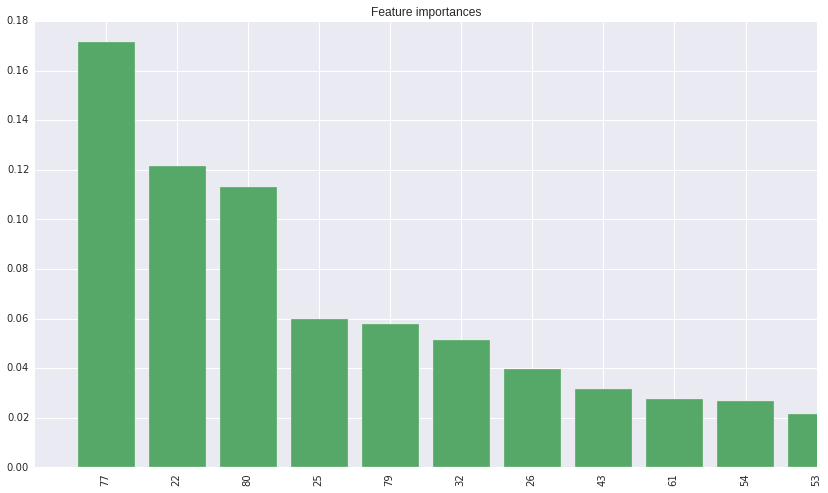

In [176]:
print "%s %d" % ('       Mushroom Amount:', len(shrooms))
print "%s %d" % ('            Poisonoius:', len(shrooms.loc[shrooms['CLASS'] == 0]))
print "%s %d" % ('                Edible:', len(shrooms.loc[shrooms['CLASS'] == 1]))
print "%s %d" % ('             All in ds:', len(shrooms))
print ""
# top_rank = []
i = len(new_X[0])
impFeatNum = len(new_X[0])
print "Number of most important features: ", len(new_X[0])
print("Feature ranking:") # create table
for f in range(len(new_X[0] - 16)):
    top_rank.append(indices[f])
    print("%d. # %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], 
                                X[top_rank].columns[f]))

# Plot the feature importances of the forest
plt.figure(figsize=(14,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="g", align="center")
plt.xticks(range(len(indices)), indices, rotation='vertical')
plt.xlim([-1, 10])
plt.show()

# ax = sns.barplot(range(len(indices)),importances[indices], palette="Set3")
# ax.set_title('Feature Importances')
# ax.set(ylabel="Importance")
# ax.set(xlabel="Rank")
# ax.set_xlim(-1,11)

###3A. Modeling & Evaluation: Create 21 Models with Random Forest Classifier; Fit each model with 1 to 21 features; Record cross-valdated evaluation metrics of each model

In [177]:
models,y_scores,y_preds,y_trues,folds_L = [],[],[],[],[]
accuracies,precisions,recalls,f1s,neg_log_LRs = [],[],[],[],[]
ham_losses, mccs, jaccards, briers, zeroOneLosses = [],[],[],[],[]
roc_aucs, precisions_PRC_L, recalls_PRC_L, thresholds_PRC_l = [],[],[],[]
target_names = ['Poisonous', 'Edible']
X_trains, X_tests, y_trains, y_tests = [],[],[],[]

i = len(new_X[0]) - 1
while i >= 0:
    model = []
    top_rank = []
    if i != 26:
        for f in range(len(new_X[0]) - i):
            top_rank.append(indices[f])
    else:
        for f in range(len(new_X[0])):
            top_rank.append(indices[f])

    X_train, X_test, y_train, y_test = train_test_split(
    X[top_rank], y, test_size=0.25, random_state=777)
    X_trains.append(X_train)
    X_tests.append(X_test)
    y_trains.append(y_train)
    y_tests.append(y_test)

    rfclf = RandomForestClassifier(random_state = 777)
    model = rfclf.fit(X_train, y_train) 
    y_score = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    y_true = np.array(np.float64(y_test))

    models.append(model)
    y_scores.append(model.predict_proba(X_test))
    y_preds.append(model.predict(X_test))
    y_trues.append(y_true)
    folds = 10 

    accuracies.append(np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='accuracy')))
    precisions.append(np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='precision')))
#     recalls.append(np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='recall')))
    f1s.append(np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='f1')))
    neg_log_LRs.append(np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='log_loss')))

#   sklearn.metrics
    ham_losses.append(hamming_loss(y_true, y_pred))
    mccs.append(matthews_corrcoef(y_true, y_pred))
    jaccards.append(jaccard_similarity_score(y_true, y_pred))
    briers.append(brier_score_loss(y_true, y_score[:,1]))
    zeroOneLosses.append(zero_one_loss(y_true, y_pred))
#     prfbs.append(precision_recall_fscore_support(y_true, y_pred))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    precision_PRC, recall_PRC, thresholds_PRC = precision_recall_curve(y_test, y_score[:,1])
    i-=1

###3B. Modeling & Evaluation: Plot an interpret evaluation metrics in order to determine Significant Bernoulli Variable features determining mushroom toxicity 

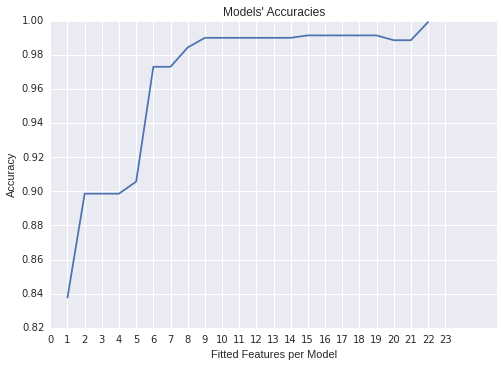

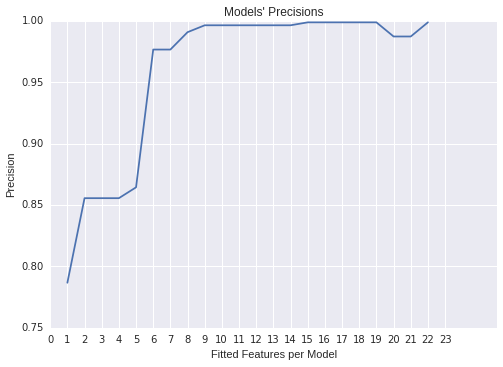

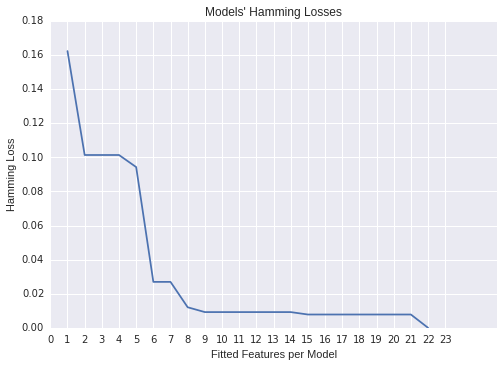

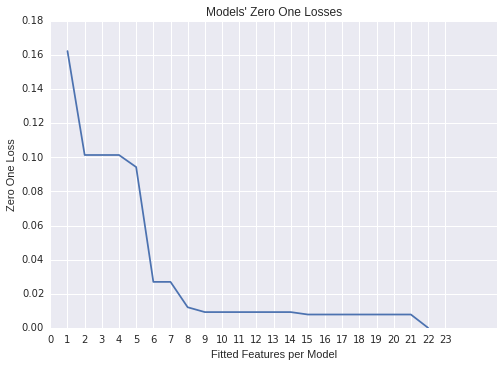

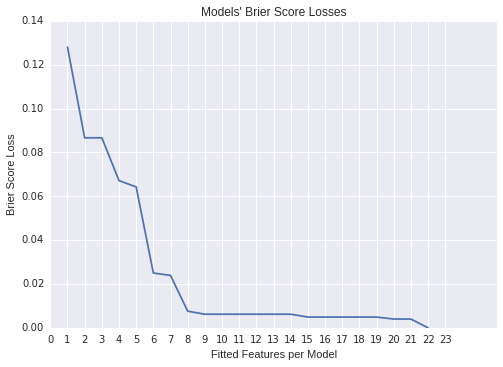

In [178]:
ticks = np.arange(-1, (impFeatNum + 1))
labels = range(ticks.size)    

plt.figure()
plt.title("Models' Accuracies")
plt.plot([models.index(m) for m in models], accuracies)
plt.xticks(ticks, labels)
plt.xlabel('Fitted Features per Model')
plt.ylabel('Accuracy')
plt.show()

plt.figure()
plt.title("Models' Precisions")
plt.plot([models.index(m) for m in models], precisions)
plt.xticks(ticks, labels)
plt.xlabel('Fitted Features per Model')
plt.ylabel('Precision')
plt.show()

plt.figure()
plt.title("Models' Hamming Losses")
plt.plot([models.index(m) for m in models], ham_losses)
plt.xticks(ticks, labels)
plt.xlabel('Fitted Features per Model')
plt.ylabel('Hamming Loss')
plt.show()

plt.figure()
plt.title("Models' Zero One Losses")
plt.plot([models.index(m) for m in models], zeroOneLosses)
plt.xticks(ticks, labels)
plt.xlabel('Fitted Features per Model')
plt.ylabel('Zero One Loss')
plt.show()

plt.figure()
plt.title("Models' Brier Score Losses")
plt.plot([models.index(m) for m in models], briers)
plt.xticks(ticks, labels)
plt.xlabel('Fitted Features per Model')
plt.ylabel('Brier Score Loss')
plt.show() 

###4. Evaluate Models created with multiple estimators/algorithms/techniques; Chose Random Forest Classifier 

             precision    recall  f1-score   support

          e       1.00      1.00      1.00       569
          p       1.00      1.00      1.00       842

avg / total       1.00      1.00      1.00      1411

LogisticRegression            
Accuracy: 0.9979
Precision: 0.9965
f1: 0.9982
AUC: 1.0000



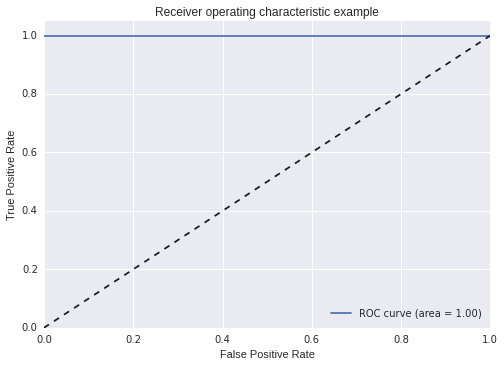

KNeighborsClassifier          
Accuracy: 0.9979
Precision: 0.9988
f1: 0.9982
AUC: 1.0000



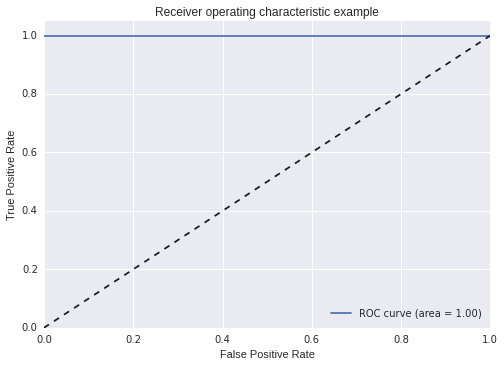

GaussianNB                    
Accuracy: 0.9511
Precision: 0.9276
f1: 0.9606
AUC: 1.0000



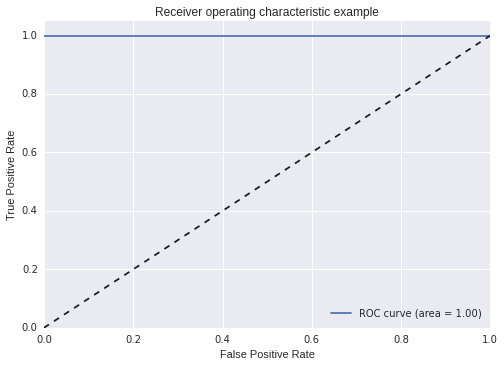

SVC                           
Accuracy: 0.9964
Precision: 0.9965
f1: 0.9970
AUC: 1.0000



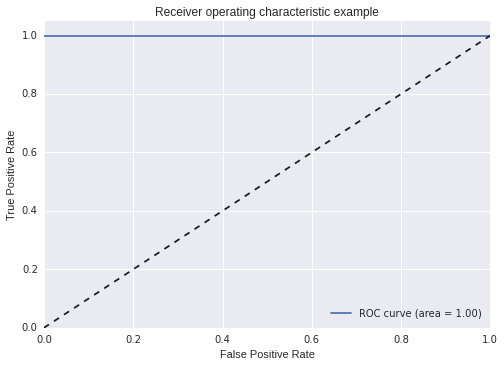

DecisionTreeClassifier        
Accuracy: 0.9993
Precision: 0.9988
f1: 0.9994
AUC: 1.0000



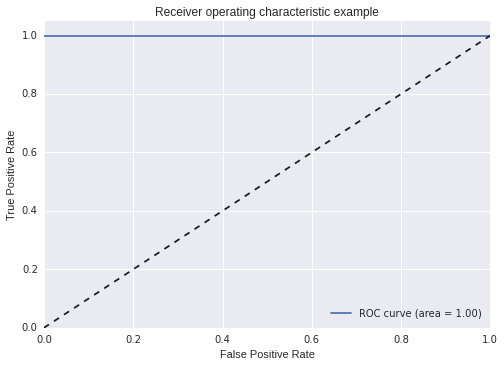

RandomForestClassifier        
Accuracy: 0.9993
Precision: 0.9988
f1: 0.9994
AUC: 1.0000



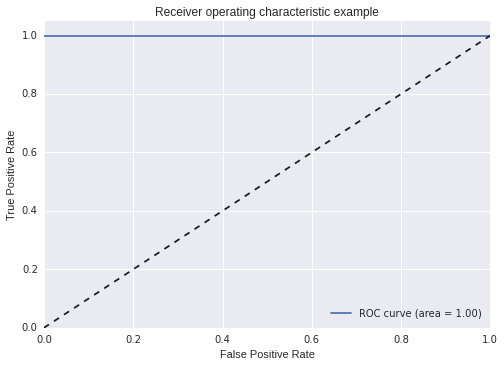

In [180]:
# 1,2,4,5,6,7,9,10,12,18,19
m = impFeatNum - 1
names, accs = [],[]
y_true = np.array(y_tests[m])
y_pred = models[m].predict(X_tests[m])
target_names = ["e", "p"]
print classification_report(y_tests[m], y_pred, target_names=target_names)
for algorithm in (LogisticRegression,
                 KNeighborsClassifier,
                 GaussianNB,
                 SVC,
                 DecisionTreeClassifier,
                 RandomForestClassifier):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    accuracy = np.mean(cross_val_score(algorithm(), X_tests[m], y_tests[m], cv=10, scoring='accuracy'))
    precision = np.mean(cross_val_score(algorithm(), X_tests[m], y_tests[m], cv=10, scoring='precision'))
    recall = np.mean(cross_val_score(algorithm(), X_tests[m], y_tests[m], cv=10, scoring='recall'))
    f1 = np.mean(cross_val_score(algorithm(), X_tests[m], y_tests[m], cv=10, scoring='f1'))

    if algorithm is SVC:
        model = []
        model = SVC(probability=True).fit(X_tests[m], y_tests[m])
        y_score = models[m].predict_proba(X_tests[m])
        fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1])
        roc_auc = auc(fpr, tpr)
    elif algorithm is DecisionTreeClassifier:
        model = []
        model = DecisionTreeClassifier().fit(X_tests[m], y_tests[m])
        y_score = models[m].predict_proba(X_tests[m])
        fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1])
        roc_auc = auc(fpr, tpr)
    else:
        model = []
        model = algorithm().fit(X_tests[m], y_tests[m])
        y_score = models[m].predict_proba(X_tests[m])
        fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1])
        roc_auc = auc(fpr, tpr)

    names.append(algorithm.__name__)
    accs.append(accuracy)
    print '%-30s' % (algorithm.__name__)
    print '%s %.4f' % ("Accuracy:", accuracy)
    print '%s %.4f' % ("Precision:", precision)
#     print '%s %.4f' % ("Recall:", recall)
    print '%s %.4f' % ("f1:", f1)
    print '%s %.4f' % ("AUC:", roc_auc)
#     model.summary()
    print ''

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

###5. Create & Evaluate final model with RandomForestClassifier, fitted with the correct range of features

In [181]:
def forestReport(m):
    m-=1
    y_score = models[m].predict_proba(X_tests[m])
    y_pred = models[m].predict(X_tests[m])
    y_true = np.array(np.float64(y_tests[m]))
    folds = 10 # better metrics with more folds
    target_names = ['Poisonoius', 'Edible']

    # Cross-Validated Metrics
    accuracy = np.mean(cross_val_score(rfclf, X_tests[m], y_tests[m], cv=folds, scoring='accuracy'))
    precision = np.mean(cross_val_score(rfclf, X_tests[m], y_tests[m], cv=folds, scoring='precision'))
    recall = np.mean(cross_val_score(rfclf, X_tests[m], y_tests[m], cv=folds, scoring='recall'))
    average_precision = np.mean(cross_val_score(rfclf, X_tests[m], y_tests[m], cv=folds, scoring='average_precision'))
    f1 = np.mean(cross_val_score(rfclf, X_tests[m], y_tests[m], cv=folds, scoring='f1'))
    neg_log_LR = np.mean(cross_val_score(rfclf, X_tests[m], y_tests[m], cv=folds, scoring='log_loss'))

    # sklearn.metrics
    ham_loss = hamming_loss(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    jaccard = jaccard_similarity_score(y_true, y_pred)
    brier = brier_score_loss(y_true, y_score[:,1])
    zeroOneLoss = zero_one_loss(y_true, y_pred)
    prfbs = precision_recall_fscore_support(y_true, y_pred)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    precision_PRC, recall_PRC, thresholds_PRC = precision_recall_curve(y_test, y_score[:,1])

    print 'Random Forest Classifier'
    print ''
    print '%s %.4f' % ("X-Val_Score -        Accuracy:", accuracy)
    print ''
    print '%s %.4f' % ("X-Val_score -  Mean Precision:", precision)
    # print '%s %.4f' % ("X-Val_score -    Mean Recall:", recall)
    # print '%s %.4f' % ("roc_curve - Mean Threshold:", np.mean(thresholds))
    print ''
    print '%s %.4f' % ("PRC -           Mean Precision:", np.mean(precision_PRC))
    # print '%s %.4f' % ("PRC -              Mean Recall:", np.mean(recall_PRC))
    # print '%s %.4f' % ("PRC -           Mean Threshold:", np.mean(thresholds_PRC))
    print ''
    print '%s %.4f' % ("                            F1:", f1)
    print '%s %.4f' % ("  Zero-one classification loss:", zeroOneLoss)
    print '%s %.4f' % ("                           MCC:", mcc)
    print '%s %.4f' % ('                  Hamming Loss:', ham_loss)
    print '%s %.4f' % ('            Jaccard Similarity:', jaccard)
    print '%s %.4f' % ('               Negative Log-LR:', neg_log_LR)
    print '%s %.4f' % ("                         Brier:", brier)
    print ''

    # Avg. Precision IS Precision-Recall AUC
    print 'AUCs:'
    print '%s %.4f' % ('             ROC -', roc_auc)
    print '%s %.4f' % ('Precision-Recall -', average_precision)
    print '*Note: average_precision = Precision-Recall AUC'
    print ''

    print '%s %.0f' % ('Poisonoius in Actual:', len(y_test.loc[y_test == 0]))
    print '%s %.0f' % ('Edible in Actual:', len(y_test.loc[y_test == 1]))
    print '%s %.0f' % ('All in Actual:', len(y_test))
    print ''

    print "Classification Report:"
    print classification_report(y_test, y_pred, target_names=target_names)

    print '%s %.0f' % ('Poisonoius in Actual:', len(y_test.loc[y_test == 0]))
    print '%s %.0f' % ('Edible in Actual:', len(y_test.loc[y_test == 1]))
    print '%s %.0f' % ('All in Actual:', len(y_test))
    print ''

    def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    cm = confusion_matrix(y_true, y_pred)
    print "Confusion Matrix: "
    print cm

    # Plot Confusioatrix
    plt.figure()
    plot_confusion_matrix(cm)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print ''
    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall_PRC, precision_PRC, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()

Random Forest Classifier

X-Val_Score -        Accuracy: 0.9887

X-Val_score -  Mean Precision: 0.9873

PRC -           Mean Precision: 0.9961

                            F1: 0.9906
  Zero-one classification loss: 0.0078
                           MCC: 0.9840
                  Hamming Loss: 0.0078
            Jaccard Similarity: 0.9922
               Negative Log-LR: -0.0133
                         Brier: 0.0040

AUCs:
             ROC - 0.9999
Precision-Recall - 0.9999
*Note: average_precision = Precision-Recall AUC

Poisonoius in Actual: 569
Edible in Actual: 842
All in Actual: 1411

Classification Report:
             precision    recall  f1-score   support

 Poisonoius       0.98      1.00      0.99       569
     Edible       1.00      0.99      0.99       842

avg / total       0.99      0.99      0.99      1411

Poisonoius in Actual: 569
Edible in Actual: 842
All in Actual: 1411

Confusion Matrix: 
[[569   0]
 [ 11 831]]


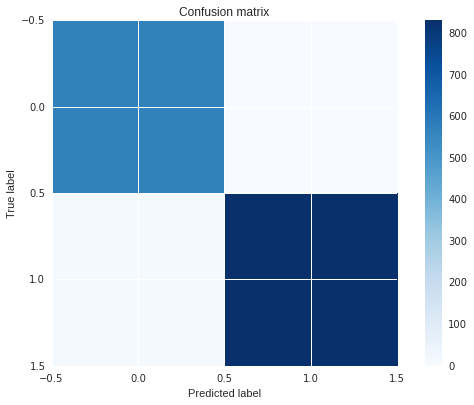

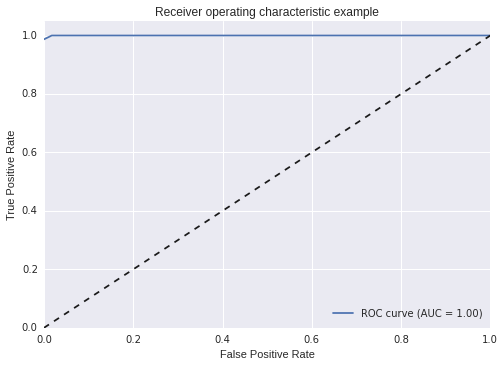

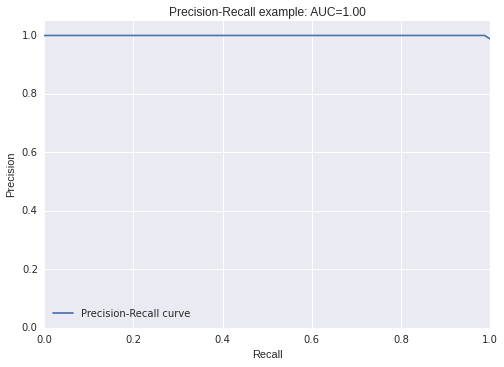

In [182]:
forestReport(21)